# Death rate in Poland

Źródła danych:
* [Biuletyn Statystyczny Nr 2020.02 - TABL. 7   STAN I RUCH NATURALNY LUDNOŚCI](https://stat.gov.pl/files/gfx/portalinformacyjny/pl/defaultaktualnosci/5498/4/97/1/tabl7_stan_i_ruch_naturalny_ludnosci.xlsx)
* [Biuletyn Statystyczny Nr 2020.03 - TABL. 7   STAN I RUCH NATURALNY LUDNOŚCI](https://stat.gov.pl/files/gfx/portalinformacyjny/pl/defaultaktualnosci/5498/4/98/1/tabl7_stan_i_ruch_naturalny_ludnosci.xlsx)

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from pandas.tseries.offsets import MonthEnd

# Get plots with higher resolution
%config InlineBackend.figure_format = 'retina'

# Default styling for plots
sns.set(style="white", palette="muted", color_codes=True)

In [2]:
filepath = os.path.join('..', 'data', 'poland', '2020.03_tabl7_stan_i_ruch_naturalny_ludnosci.xlsx')
df = pd.read_excel(filepath)

In [3]:
# drop useless rows/observations
df = df.drop([0, 1, 2, 3, 4, 5])

# choose data we want to analyze
df = df[['LUDNOŚĆ', 'Unnamed: 11', 'Unnamed: 21']]
df.columns = ['period', 'deaths', 'death_rate_per_1000']
df

,period,deaths,death_rate_per_1000
6,2010 I,33.7,10.6
7,2010 II,29.7,9.3
8,2010 III,31.7,10
9,2010 IV,31,9.7
10,2010 V,31.4,9.9
...,...,...,...
123,2019 X,34.4,10.7
124,2019 XI,31.6,9.9
125,2019 XII,36.9,11.5
126,2020 I,37,11.6


In [4]:
df['period'] = df['period'].str.replace(' XII',  '.12')
df['period'] = df['period'].str.replace(' XI',   '.11')
df['period'] = df['period'].str.replace(' X',    '.10')
df['period'] = df['period'].str.replace(' IX',   '.09')
df['period'] = df['period'].str.replace(' VIII', '.08')
df['period'] = df['period'].str.replace(' VII',  '.07')
df['period'] = df['period'].str.replace(' VI',   '.06')
df['period'] = df['period'].str.replace(' V',    '.05')
df['period'] = df['period'].str.replace(' IV',   '.04')
df['period'] = df['period'].str.replace(' III',  '.03')
df['period'] = df['period'].str.replace(' II',   '.02')
df['period'] = df['period'].str.replace(' I',    '.01')

df['period'] = pd.to_datetime(df['period'], format="%Y.%m") + MonthEnd(1)
df['month'] = pd.to_datetime(df['period'], format="%Y.%m").dt.month
df['deaths_yearly_change'] = df['deaths'].diff(12)
df['death_rate_yearly_change'] = df['death_rate_per_1000'].diff(12)

df.tail(20)

,period,deaths,death_rate_per_1000,month,deaths_yearly_change,death_rate_yearly_change
108,2018-07-31,33,10.3,7,2.6,0.8
109,2018-08-31,31.9,10,8,0.9,0.3
110,2018-09-30,29.1,9.1,9,-0.8,-0.2
111,2018-10-31,36.1,11.3,10,1,0.3
112,2018-11-30,32.8,10.2,11,0.4,0.1
113,2018-12-31,35.9,11.2,12,2.6,0.8
114,2019-01-31,39.2,12.3,1,-0.5,-0.1
115,2019-02-28,36.3,11.4,2,-0.5,-0.1
116,2019-03-31,34.1,10.6,3,-6.6,-2.1
117,2019-04-30,35.5,11.1,4,-0.2,-0.1


In [5]:
df['death_rate_per_1000'] = df['death_rate_per_1000'].astype(float)
df = df.set_index('period')

In [6]:
df.tail(20)

,deaths,death_rate_per_1000,month,deaths_yearly_change,death_rate_yearly_change
period,,,,,
2018-07-31,33,10.3,7,2.6,0.8
2018-08-31,31.9,10.0,8,0.9,0.3
2018-09-30,29.1,9.1,9,-0.8,-0.2
2018-10-31,36.1,11.3,10,1,0.3
2018-11-30,32.8,10.2,11,0.4,0.1
2018-12-31,35.9,11.2,12,2.6,0.8
2019-01-31,39.2,12.3,1,-0.5,-0.1
2019-02-28,36.3,11.4,2,-0.5,-0.1
2019-03-31,34.1,10.6,3,-6.6,-2.1


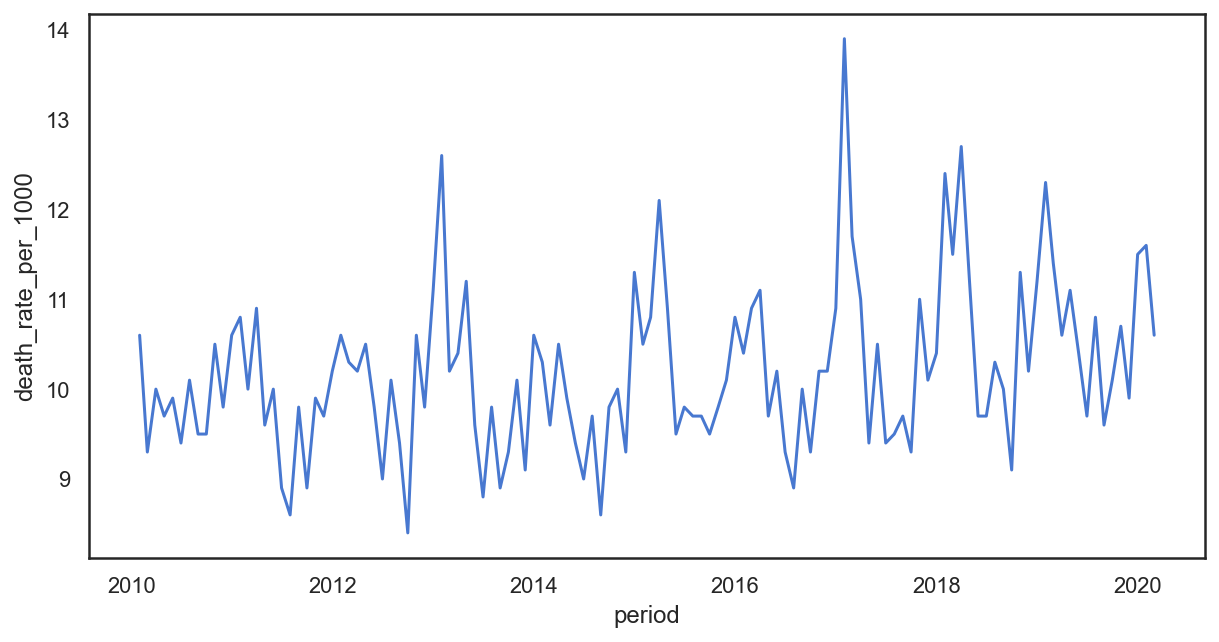

In [7]:
fig, axs = plt.subplots(1,1, figsize=(10,5))
sns.lineplot(x=df.index, y='death_rate_per_1000', data=df, ax=axs);

> Komentarz: Widoczna sezonowość - w okresach zimowych większa ilość zgonów, a w okresach letnich - mniejsza.

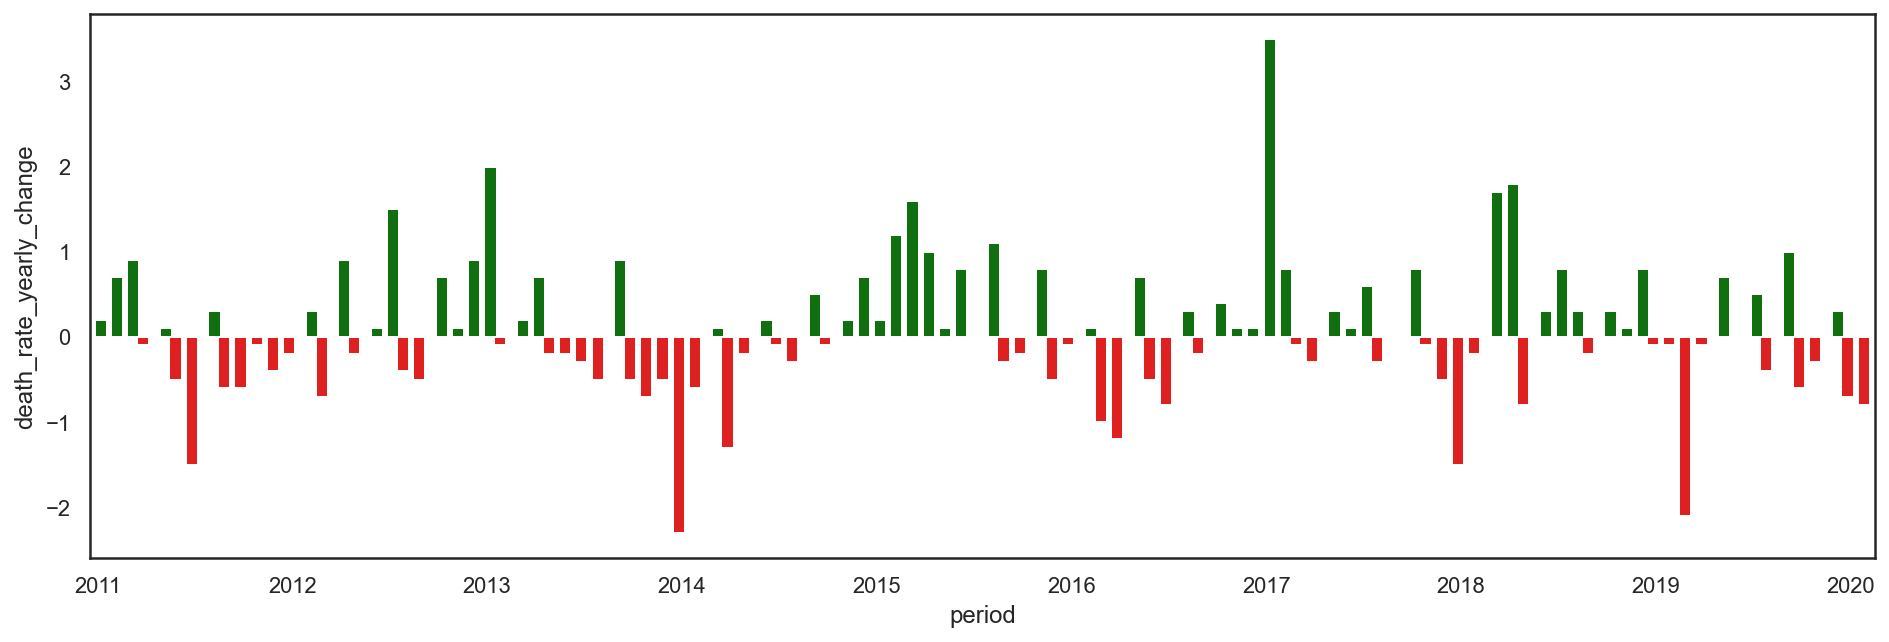

In [8]:
df_tmp = df[['death_rate_yearly_change']].dropna()

fig, axs = plt.subplots(1,1, figsize=(16,5))

# set green and red colors
colors = df_tmp['death_rate_yearly_change'] >= 0
colors = colors.astype(int)
palette = sns.color_palette(['red','green'])

sns.barplot(x=df_tmp.index, y='death_rate_yearly_change', data=df_tmp, ax=axs, hue=colors, palette=palette)
axs.legend().set_visible(False)

# display only some labels on the x axis
x_dates = [i.strftime('%Y') if i.month==1 else '' for i in df_tmp.index]
axs.set_xticklabels(labels=x_dates, rotation=0)

# change bar width
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(axs, .75)

In [9]:
df_monthly_stats = df['death_rate_per_1000'] \
                        .groupby(by=[df.index.month]) \
                        .agg(['count', 'sum', 'mean', 'std'])
df_monthly_stats.index.rename('month', inplace=True)
df_monthly_stats

,count,sum,mean,std
month,,,,
1,11,126.0,11.454545,1.190264
2,11,116.3,10.572727,0.779860
3,10,109.5,10.950000,0.850163
4,10,103.2,10.320000,0.733030
5,10,99.0,9.900000,0.374166
6,10,93.0,9.300000,0.362093
7,10,97.5,9.750000,0.646787
8,10,95.2,9.520000,0.454117
9,10,93.2,9.320000,0.468568


In [10]:
ci95_low  = []
ci95_high = []

for i in df_monthly_stats.index:
    count, _, mean, std = df_monthly_stats.loc[i]
    z = 1.96  # number of standard deviations away from the average
              # where we can find 95% of observations
    ci95_low.append(mean - z * (std / math.sqrt(count)))
    ci95_high.append(mean + z * (std / math.sqrt(count)))

df_monthly_stats['ci95_LOW'] = ci95_low
df_monthly_stats['ci95_HIGH'] = ci95_high

df_monthly_stats

,count,sum,mean,std,ci95_LOW,ci95_HIGH
month,,,,,,
1,11,126.0,11.454545,1.190264,10.751145,12.157946
2,11,116.3,10.572727,0.779860,10.111859,11.033595
3,10,109.5,10.950000,0.850163,10.423063,11.476937
4,10,103.2,10.320000,0.733030,9.865663,10.774337
5,10,99.0,9.900000,0.374166,9.668090,10.131910
6,10,93.0,9.300000,0.362093,9.075573,9.524427
7,10,97.5,9.750000,0.646787,9.349117,10.150883
8,10,95.2,9.520000,0.454117,9.238535,9.801465
9,10,93.2,9.320000,0.468568,9.029579,9.610421


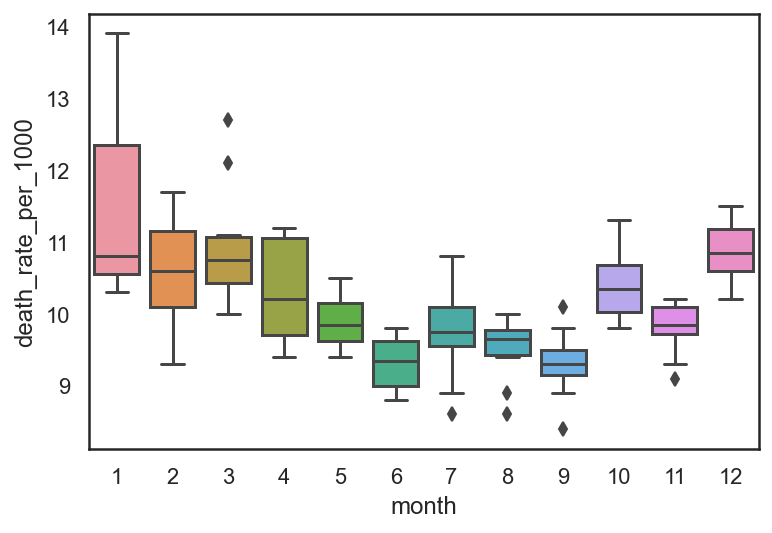

In [11]:
sns.boxplot(x='month', y='death_rate_per_1000', data=df);

In [12]:
from scipy import stats

stats.f_oneway(
    df.loc[df['month']==1, 'death_rate_per_1000'], 
    df.loc[df['month']==2, 'death_rate_per_1000'], 
    df.loc[df['month']==3, 'death_rate_per_1000'], 
    df.loc[df['month']==4, 'death_rate_per_1000'], 
    df.loc[df['month']==5, 'death_rate_per_1000'], 
    df.loc[df['month']==6, 'death_rate_per_1000'], 
    df.loc[df['month']==7, 'death_rate_per_1000'], 
    df.loc[df['month']==8, 'death_rate_per_1000'], 
    df.loc[df['month']==9, 'death_rate_per_1000'], 
    df.loc[df['month']==10, 'death_rate_per_1000'], 
    df.loc[df['month']==11, 'death_rate_per_1000'], 
    df.loc[df['month']==12, 'death_rate_per_1000']    
)

F_onewayResult(statistic=11.62569714143543, pvalue=3.9983756144588866e-14)

> Komentarz: pvalue << 0.05, różnice w wart. średnich są istotne statystycznie